In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import io
import torch
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

from orthogonal_dfa.l_star.examples.bernoulli_parity import BernoulliRegex
from orthogonal_dfa.l_star.structures import DecisionTreeLeafNode
from orthogonal_dfa.l_star.sampler import UniformSampler
from orthogonal_dfa.l_star.decision_tree_to_dfa import *
from orthogonal_dfa.utils.pdfa import batched_iterated_matrix_multiply

In [9]:
oracle = BernoulliRegex(0.6, 0, regex=r".*1111.*1111.*")

In [10]:
us = UniformSampler(40)

In [11]:
rng = np.random.default_rng(0)
np.mean([oracle.membership_query(us.sample(rng, alphabet_size=2)) for _ in range(1000)])

np.float64(0.483)

In [12]:
pst = PrefixSuffixTracker.create(
    us,
    np.random.default_rng(0),
    oracle,
    alphabet_size=2,
    num_prefixes=10_000,
    suffix_family_size=100,
    chi_squared_p_min=0.005,
    evidence_thresh=0.55,
    suffix_prevalence=0.05,
)
# dt = pst.extract_decision_tree()

Starting synthesis iteration with 10000 prefixes


Completing suffix family:   3%|3         | 3/99 [00:03<02:01,  1.27s/it]

Num states: 1; processing []


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:26,  3.63it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:26,  3.66it/s]

Num states: 2; processing [1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:26,  3.62it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:26,  3.59it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:27,  3.53it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:26,  3.56it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:26,  3.56it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:27,  3.55it/s]

Num states: 5; processing [1, 1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:27,  3.49it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:27,  3.48it/s]

Num states: 6; processing [1, 1, 1, 1, 1]
Done
Num states: 6; processing [0, 1, 1, 1, 1]
Done
Num states: 6; processing [0, 1, 1, 1]
Done
Num states: 6; processing [0, 1, 1]
Done
Num states: 6; processing [0, 1]
Done
Num states: 6; processing [0]
Done
Extracted flat decision tree with 6 states
Best DFA has success rate on 'correct' states 0.7018


  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   4%|3         | 18/500 [00:01<00:27, 17.23it/s]

[0.448 0.264 0.654 0.808 0.806]


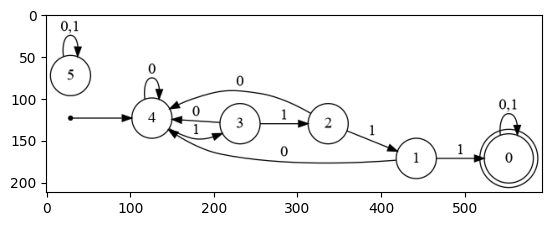

Starting synthesis iteration with 10500 prefixes
Num states: 1; processing []


Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 35.45it/s]

Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 34.78it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 34.90it/s]

Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 35.20it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 34.46it/s]

Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 34.65it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 34.14it/s]

Prepending to all suffixes:  45%|####5     | 45/100 [00:01<00:01, 34.00it/s]

Num states: 5; processing [1, 1, 1, 1]


Prepending to all suffixes:  22%|##2       | 22/100 [00:01<00:03, 21.92it/s]

Prepending to all suffixes:  22%|##2       | 22/100 [00:01<00:03, 21.77it/s]

Num states: 6; processing [1, 1, 1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:29,  3.23it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:29,  3.25it/s]

Num states: 7; processing [1, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1]
Done
Num states: 7; processing [0, 1]
Done
Num states: 7; processing [0]
Done
Extracted flat decision tree with 7 states
Best DFA has success rate on 'correct' states 0.7184


  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   3%|3         | 15/500 [00:01<00:33, 14.67it/s]

[0.434 0.448 0.266 0.66  0.802]


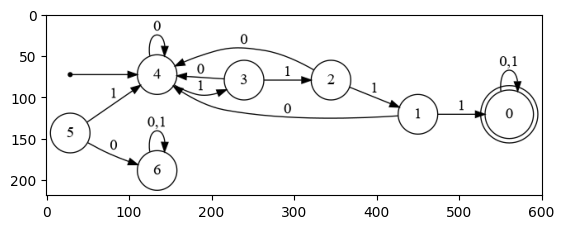

Starting synthesis iteration with 11000 prefixes
Num states: 1; processing []
Num states: 2; processing [1]
Num states: 3; processing [1, 1]
Num states: 4; processing [1, 1, 1]
Num states: 5; processing [1, 1, 1, 1]
Num states: 6; processing [1, 1, 1, 1, 1]


Prepending to all suffixes:  88%|########8 | 88/100 [00:01<00:00, 82.06it/s]

Prepending to all suffixes:  88%|########8 | 88/100 [00:01<00:00, 81.90it/s]

Num states: 7; processing [1, 1, 1, 1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:31,  3.09it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:31,  3.03it/s]

Num states: 8; processing [1, 1, 1, 1, 1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:32,  2.97it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:31,  3.02it/s]

Num states: 9; processing [1, 1, 1, 1, 1, 1, 1, 1]
Done
Num states: 9; processing [0, 1, 1, 1, 1, 1, 1, 1]
Done
Num states: 9; processing [0, 1, 1, 1, 1, 1, 1]
Done
Num states: 9; processing [0, 1, 1, 1, 1, 1]
Done
Num states: 9; processing [0, 1, 1, 1, 1]
Done
Num states: 9; processing [0, 1, 1, 1]
Done
Num states: 9; processing [0, 1, 1]
Done
Num states: 9; processing [0, 1]
Done
Num states: 9; processing [0]
Done
Extracted flat decision tree with 9 states
Best DFA has success rate on 'correct' states 0.9380
Achieved desired accuracy of 0.9; stopping synthesis


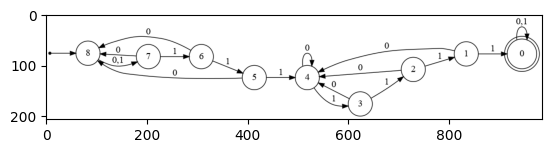

In [13]:
for dfa, results in counterexample_driven_synthesis(
    pst, min_state_size=0.01, additional_counterexamples=500, acc_threshold=0.9
):
    if results is not None:
        print(np.mean([r[0][-5:] for r in results], 0))
    plt.imshow(Image.open(io.BytesIO(dfa.show_diagram().draw(format="png"))))
    plt.show()

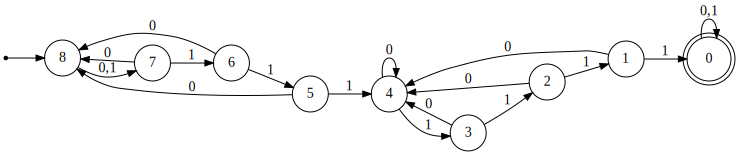

In [14]:
dfa